    --Objective
        Got the credit card consumption data.
        These are having with 3 sheets with many records.
        The data from a credit card processor shows the consumer types and their business spending behaviours.
        Understand the consumption pattern for credit card for individual consumer level for relationship management.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
pd.set_option('display.max.column',50)

In [4]:
%cd "D:\AnalytixLab Study_Content\Machine Learning\Case Study\11. Capstone Case Study - Predict Cred Card Consumption"
cust_demo= pd.read_excel("CustomerDemographics.xlsx")
cust_behv= pd.read_excel("CustomerBehaviorData.xlsx")
cust_cons= pd.read_excel("CreditConsumptionData.xlsx")

D:\AnalytixLab Study_Content\Machine Learning\Case Study\11. Capstone Case Study - Predict Cred Card Consumption


In [5]:
# To get missing value columns-
cust_demo[cust_demo.isna().any(axis=1)]


,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
49,17877,current,M,37,NaN,17.0,4,454.0,1,16.0
60,15029,current,M,49,HIGH,26.1,7,NaN,1,14.0
65,1212,current,NaN,55,MEDIUM,21.0,9,249.0,1,14.0
87,3246,current,M,33,MEDIUM,9.1,10,958.0,1,NaN
97,16199,NaN,M,56,MEDIUM,36.0,6,536.0,1,2.0
110,12413,current,M,27,LOW,3.5,8,447.0,1,NaN
126,6147,current,F,28,LOW,4.0,3,385.0,1,NaN


In [6]:
# If want to count missing value columns in dataframe-
cust_demo.isna().sum().sum()

7

In [7]:
#cust_behv[cust_behv.isna().any(axis=1)]

In [8]:
cust_behv.isnull().sum().sum()

10

In [9]:
cust_cons.isna().sum()   # these 5k unseen data have to predict.

ID            0
cc_cons    5000
dtype: int64

In [10]:
# Merging the customer behavour table and customer demographic table-

demo_behv= pd.merge(cust_demo, cust_behv, how = 'left', on= 'ID')

In [11]:
demo_behv.isna().sum().sum()

17

In [12]:
# Broken the data in categorical and numerical form-

cat_demo_behv= demo_behv.select_dtypes(include= 'object')

num_demo_behv= demo_behv.select_dtypes(include= 'number')

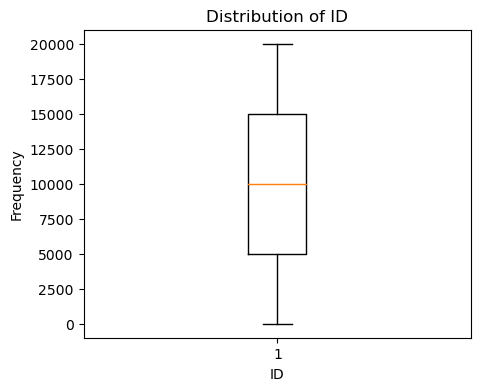

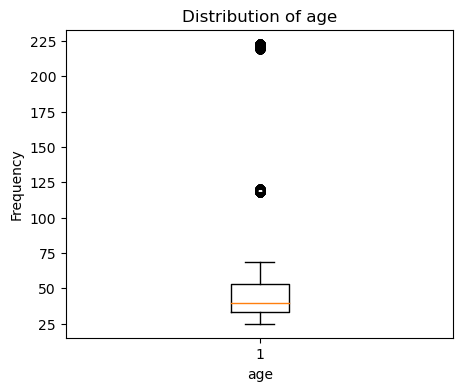

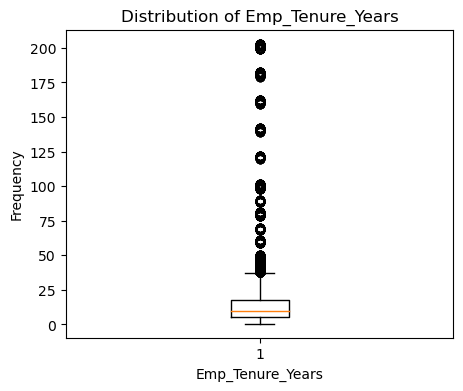

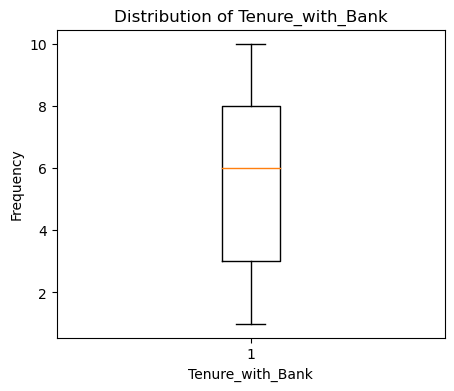

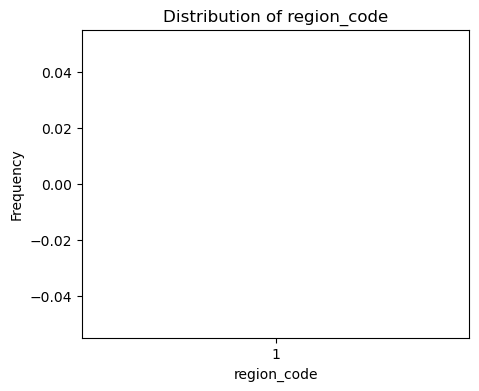

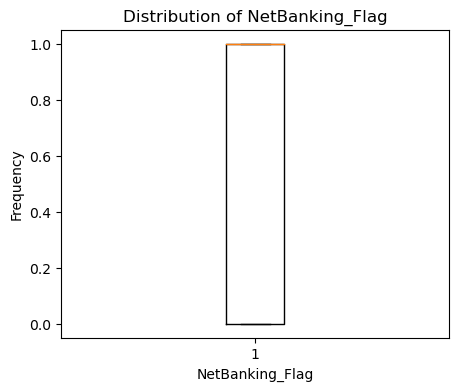

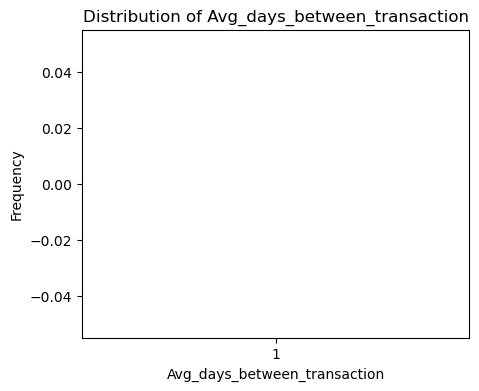

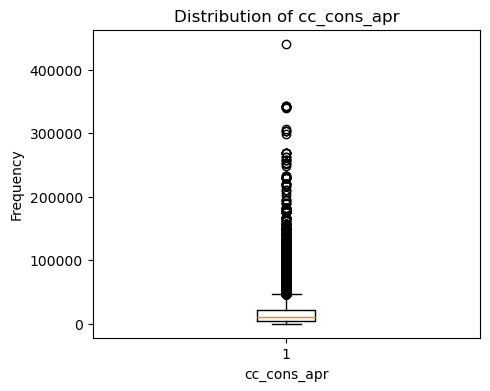

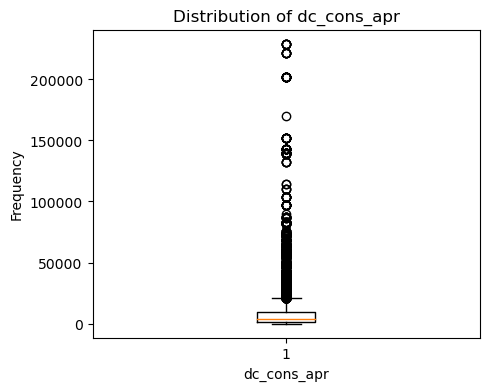

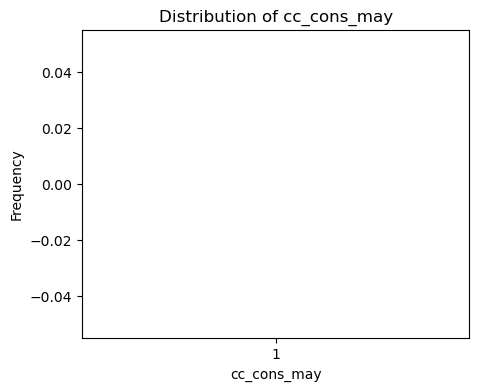

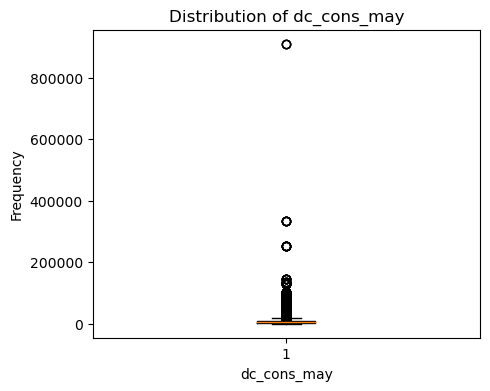

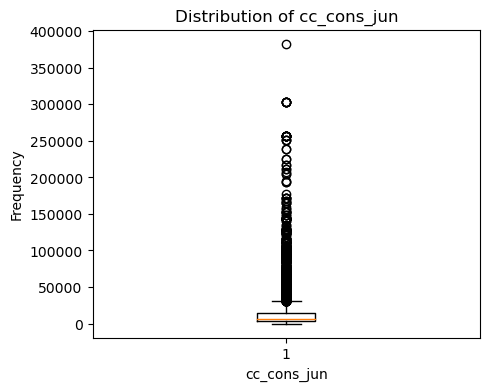

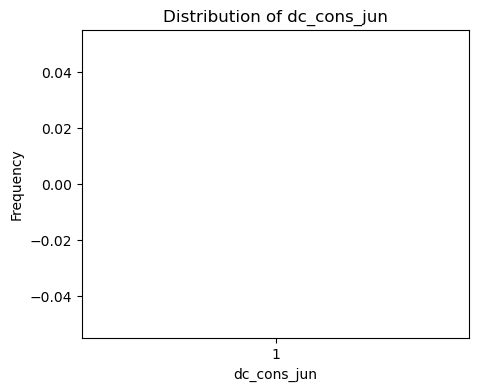

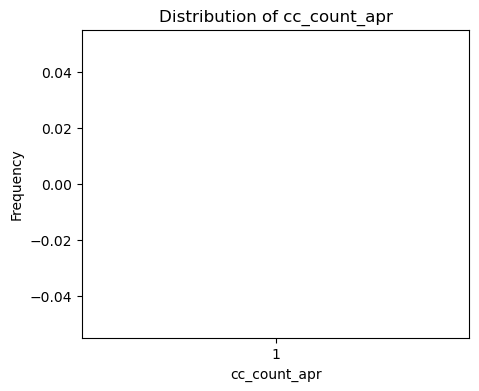

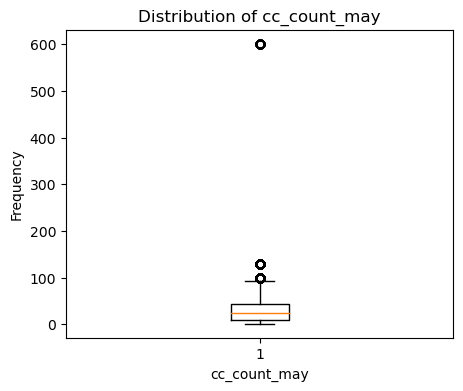

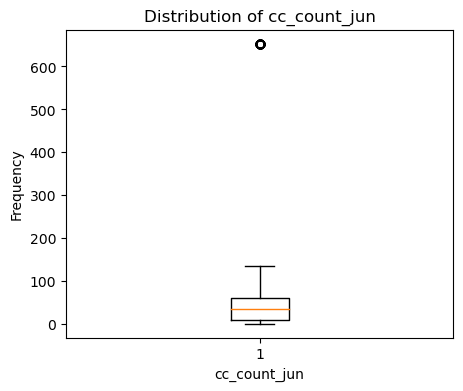

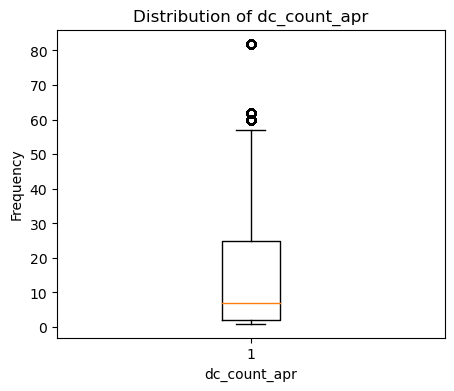

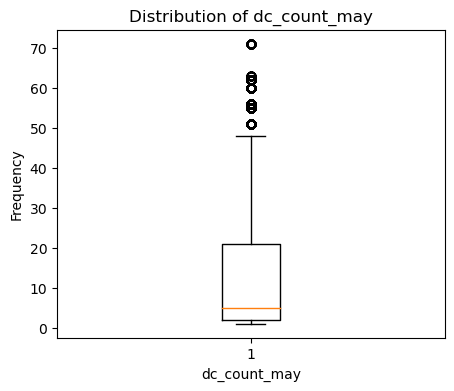

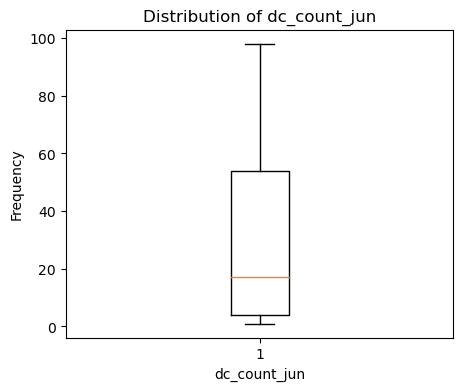

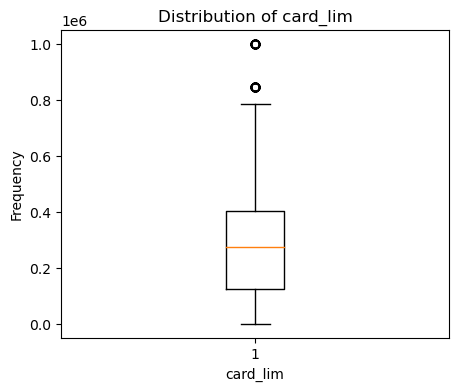

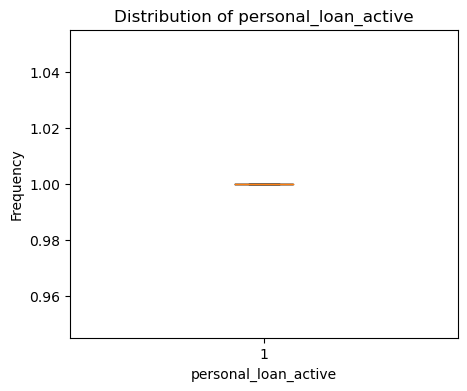

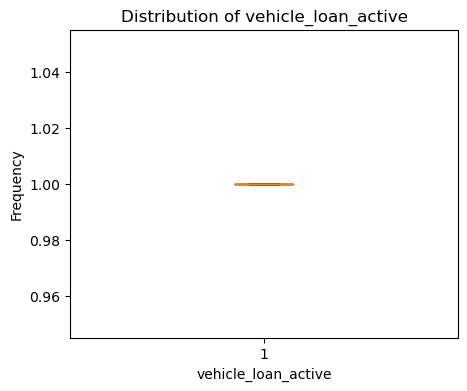

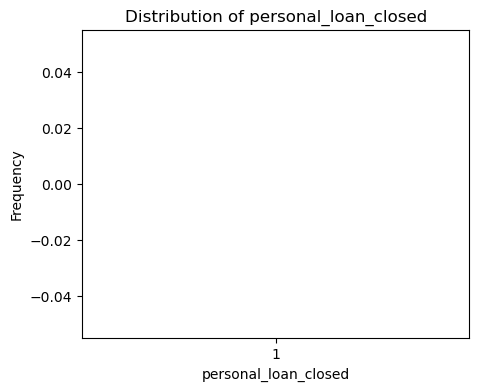

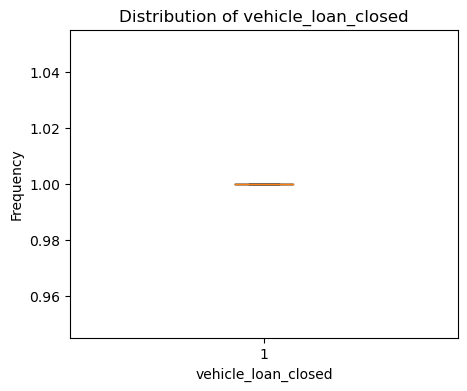

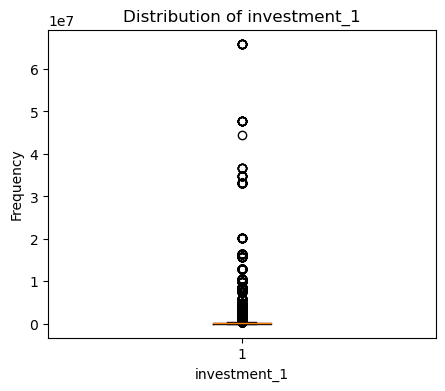

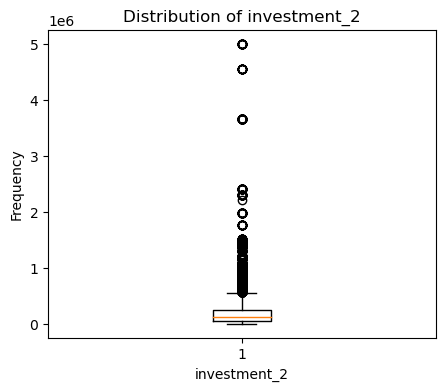

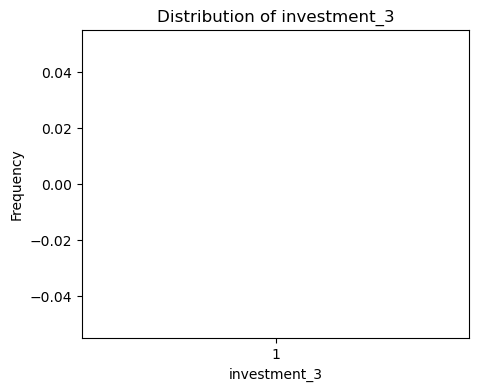

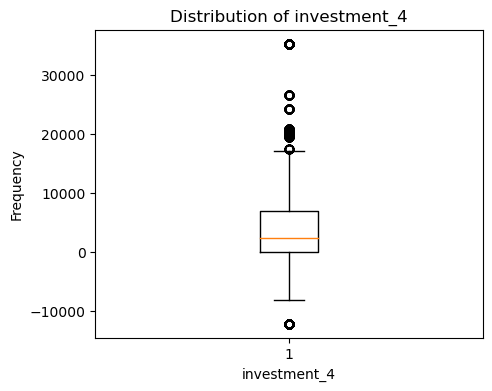

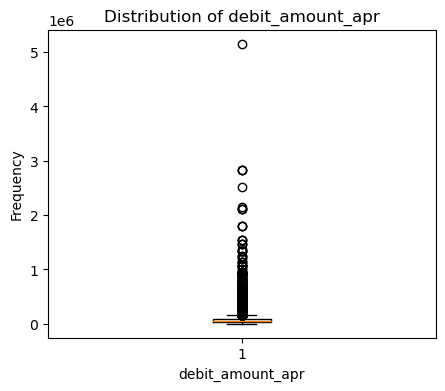

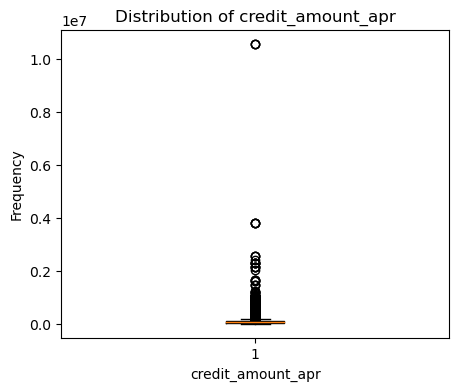

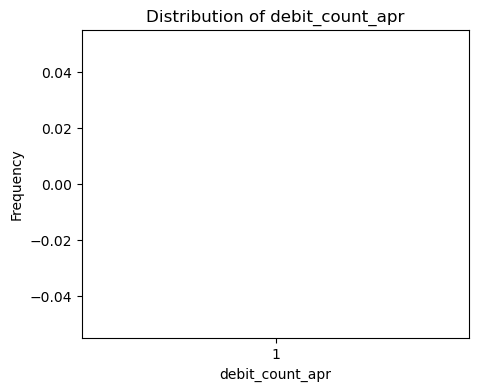

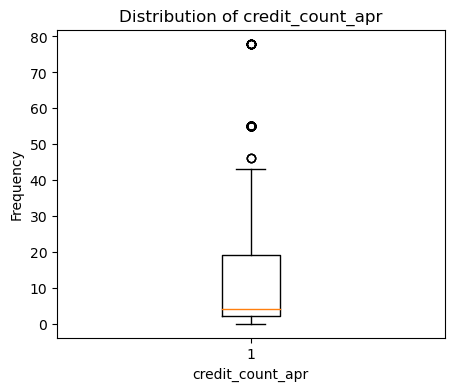

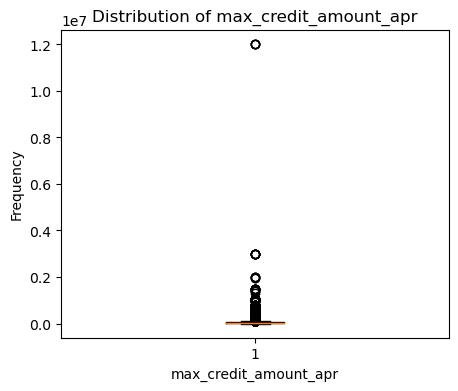

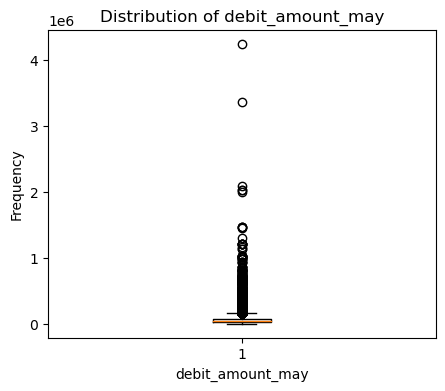

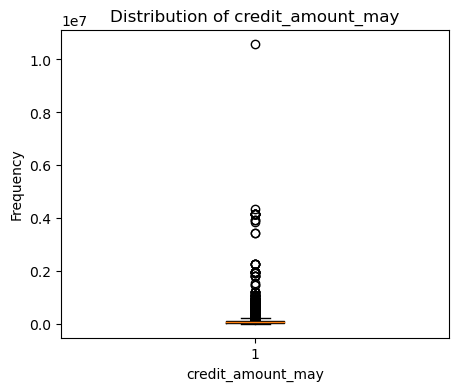

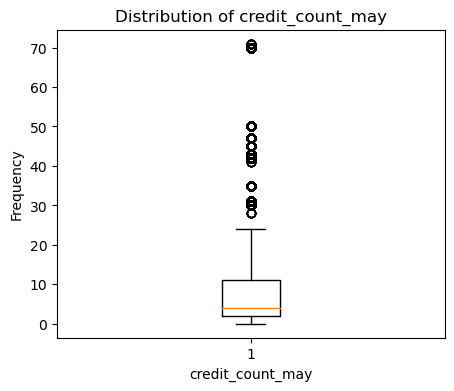

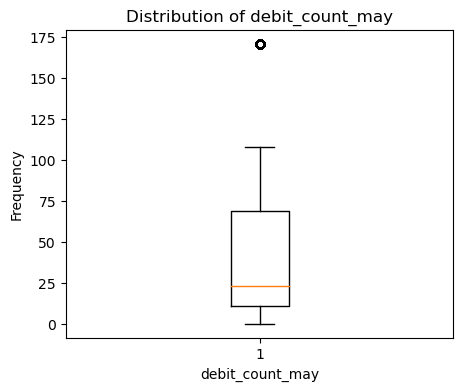

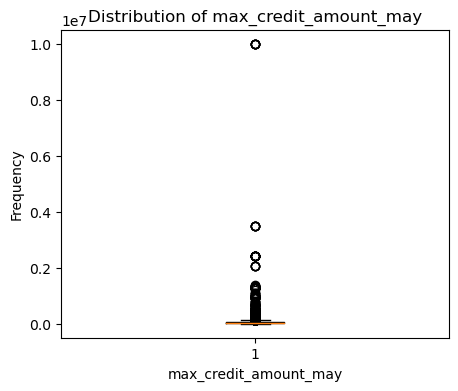

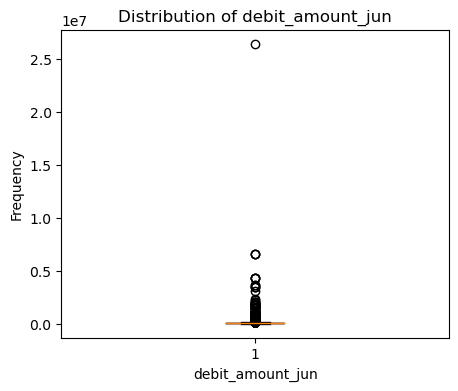

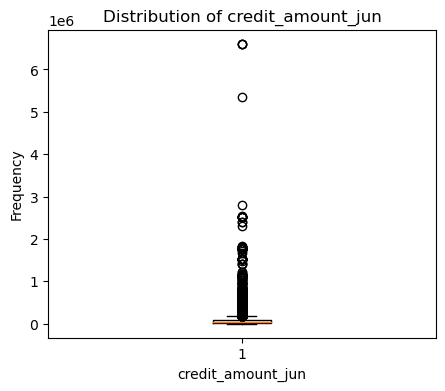

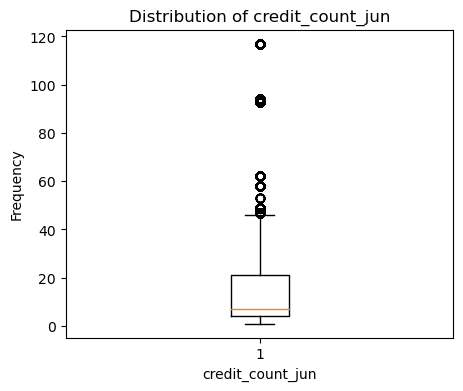

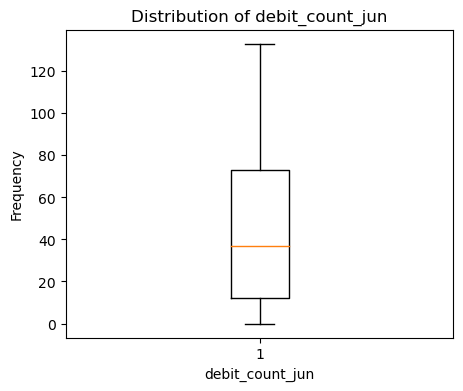

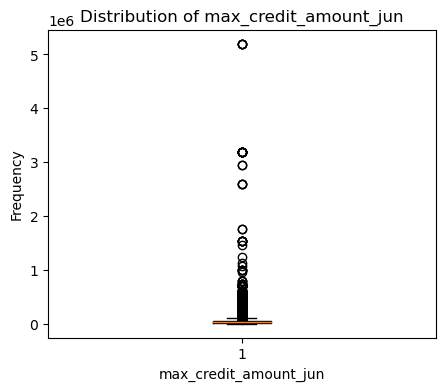

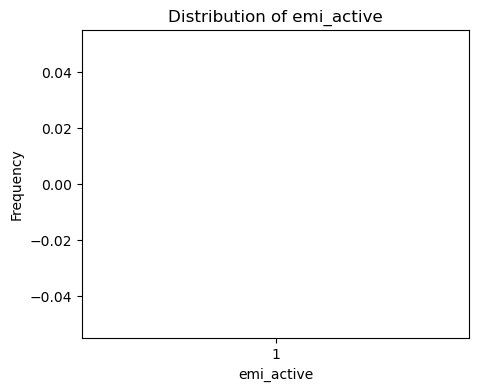

In [13]:
for i in num_demo_behv:
    plt.figure(figsize=(5, 4))
    plt.boxplot(num_demo_behv[i])
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [12]:
# Outlier --> Age, Emp_Tenure_Years

In [14]:
# Outlier treatment on numerical dataframe-

def outlier_treat(var):
    lc= var.quantile(0.10)
    uc= var.quantile(0.90)
    var= var.clip(lower= lc, upper= uc)
    return var

In [15]:
num_demo_behv['age']= outlier_treat(num_demo_behv['age'])
num_demo_behv['Emp_Tenure_Years']= outlier_treat(num_demo_behv['Emp_Tenure_Years'])


In [16]:
# Now operating missing value treatment for categorical and numerical- 

def missing_categ_value(var):
    var = var.fillna(var.mode()[0])
    return var


def missing_number_value(var):
    var = var.fillna(var.median())
    return var

In [17]:
cat_demo_behv= cat_demo_behv.apply(missing_categ_value)
num_demo_behv= num_demo_behv.apply(missing_number_value)

In [18]:
# Post missing value operation concatinating both data-

num_cat= pd.concat([cat_demo_behv, num_demo_behv], axis= 1)

In [19]:
num_cat.head(3)

,account_type,gender,Income,loan_enq,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,current,M,MEDIUM,Y,19427,63,30.1,10,628.0,1,5.0,7998.48,2289.0,9553.00,2879.58,6881.81,3124.0,8.0,23,13,47,3,30,519000,1,1,1.0,1,13659.0,14000.0,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,2646.72
1,current,M,MEDIUM,Y,16150,36,14.4,10,656.0,0,12.0,16479.64,415.0,7386.49,6763.00,12032.60,6738.0,19.0,32,7,1,37,16,402000,1,1,1.0,1,942327.7,172131.0,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,5469.79
2,current,F,MEDIUM,Y,11749,29,4.8,10,314.0,1,13.0,29272.03,40994.0,4170.53,26717.30,531.43,3778.0,12.0,30,44,22,15,37,114000,1,1,1.0,1,70310.6,208652.0,1036.0,1089.0,44916.42,24878.00,55.0,33,1035431.79,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,7207.85


In [20]:
num_cat['account_type'].value_counts()

current    16926
saving      3074
Name: account_type, dtype: int64

In [21]:
def boxplot_creator(var):
    var_char= sns.boxplot(y = var)
    plt.title("Boxplot for " + var.name)
    plt.show()
    return var_char

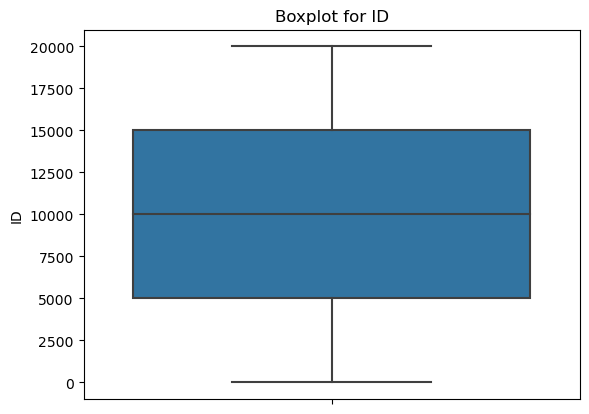

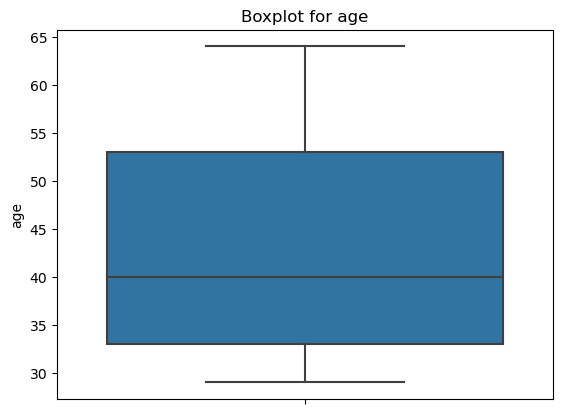

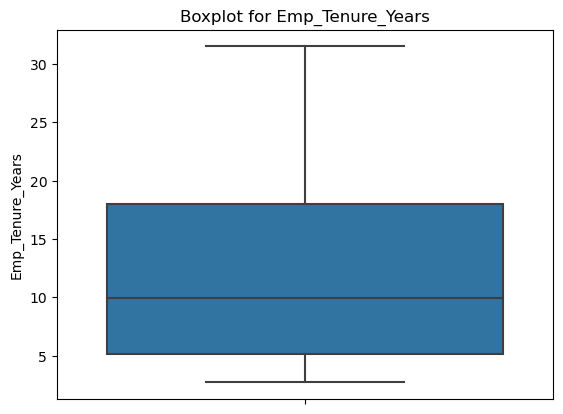

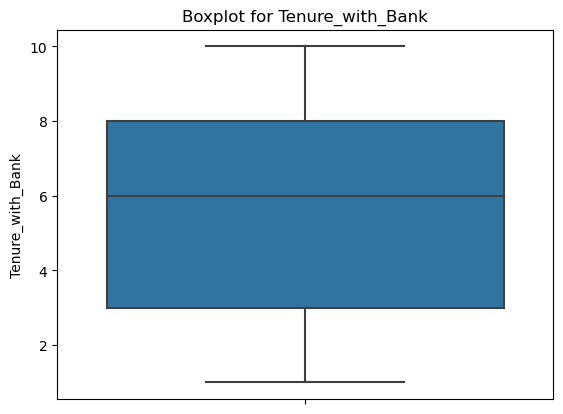

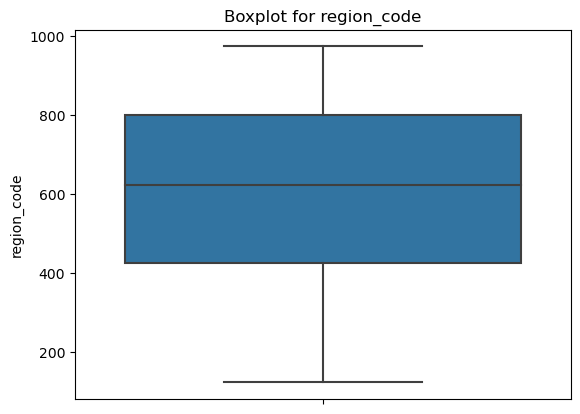

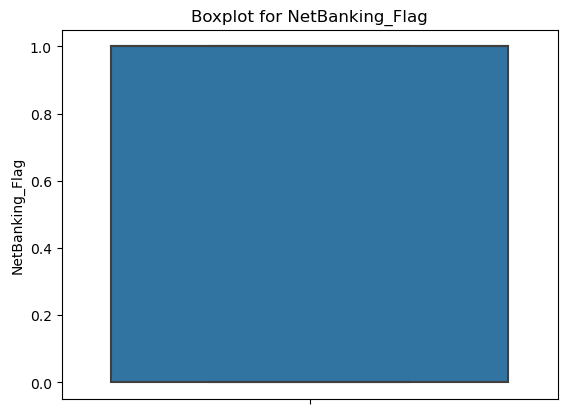

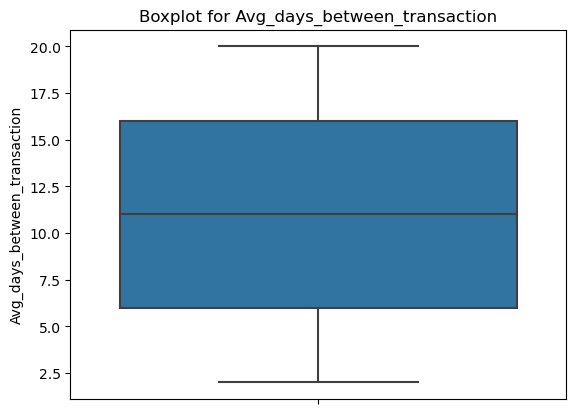

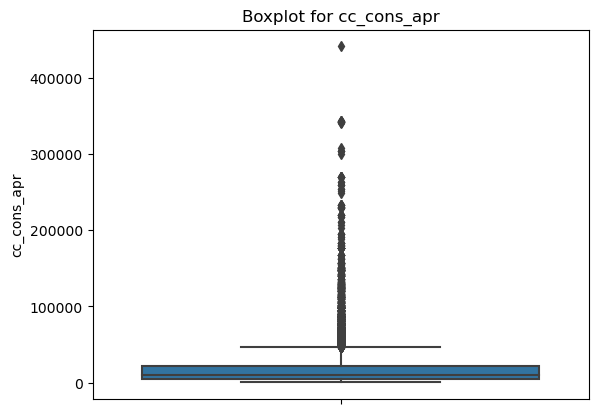

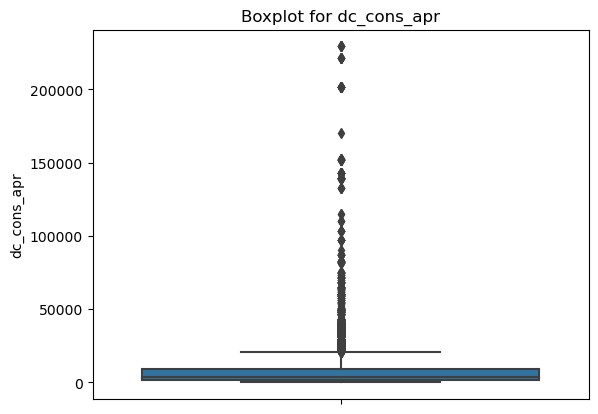

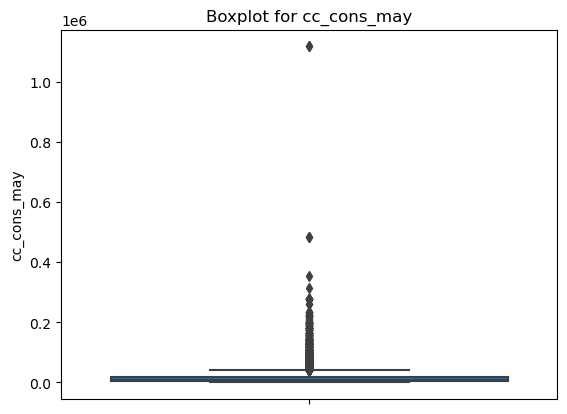

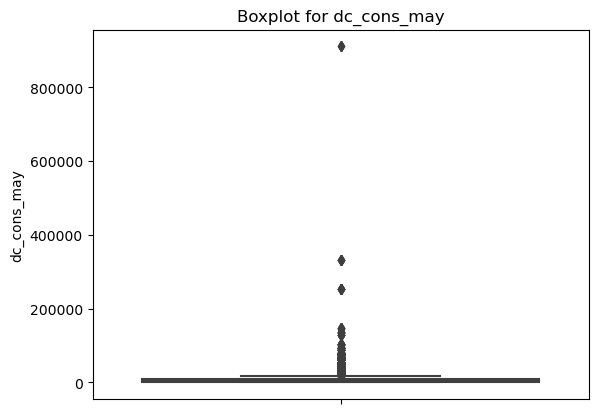

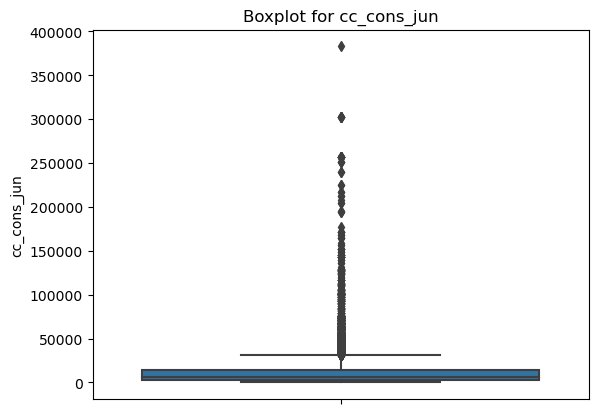

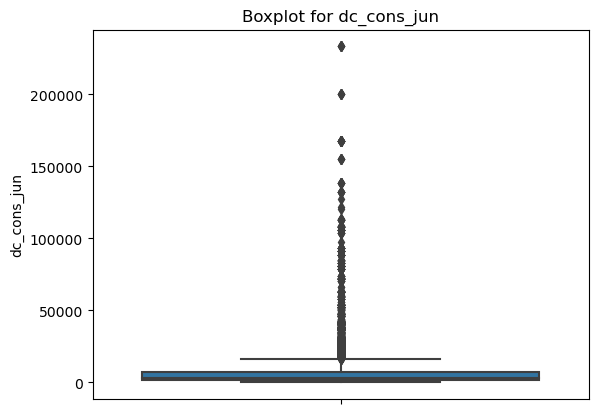

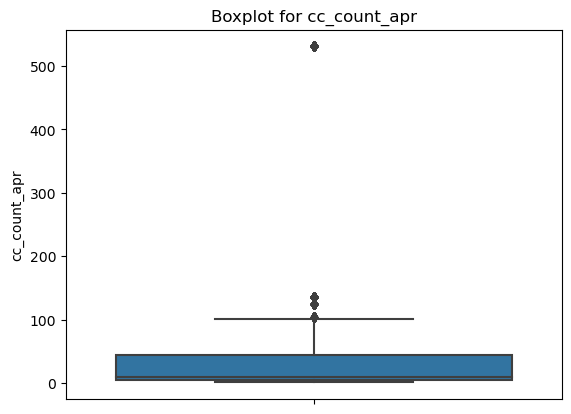

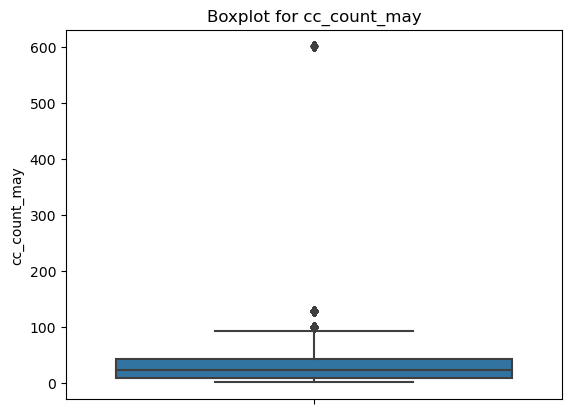

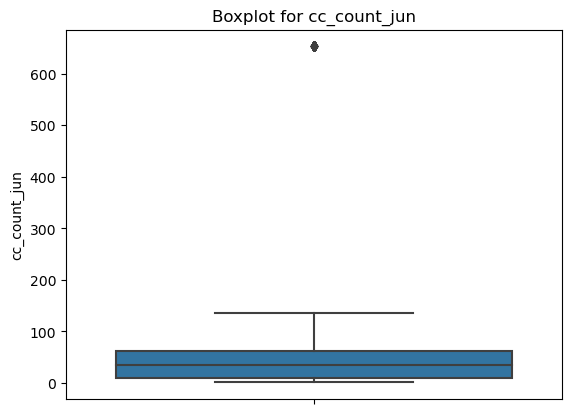

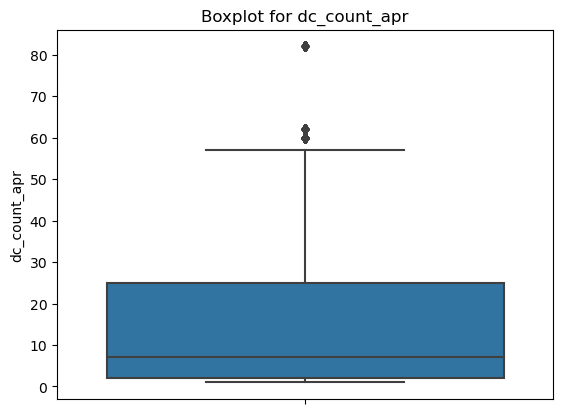

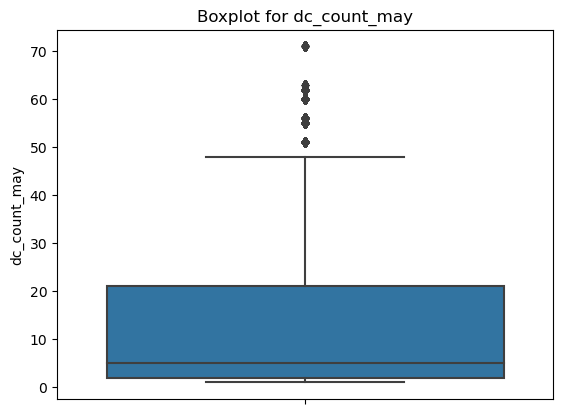

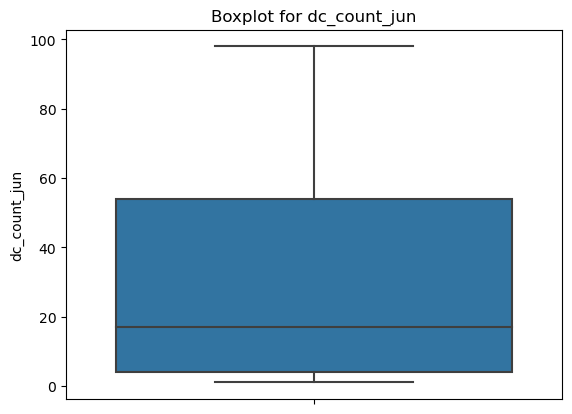

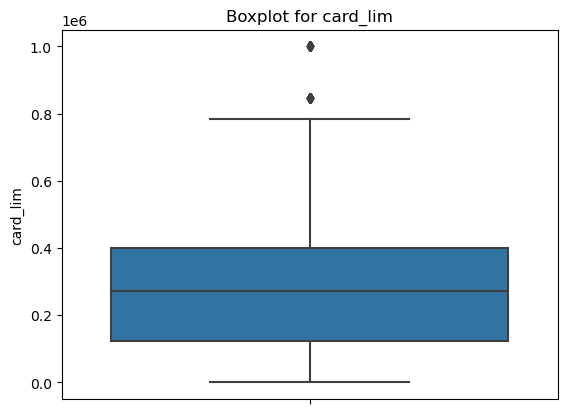

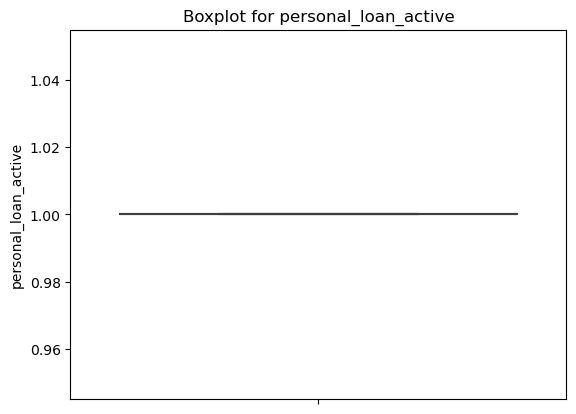

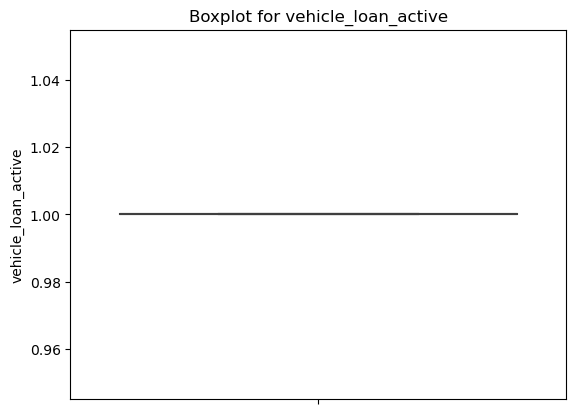

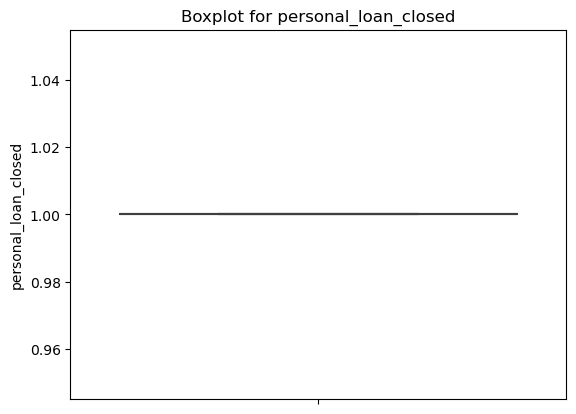

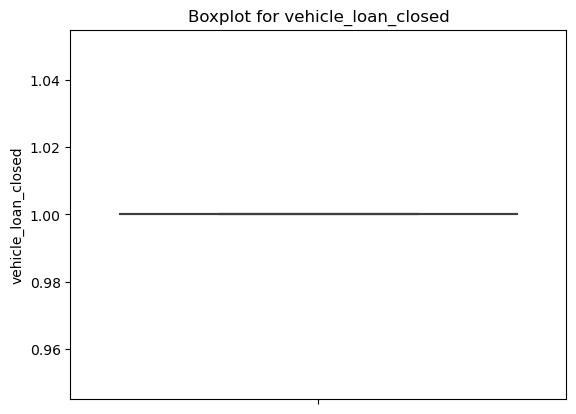

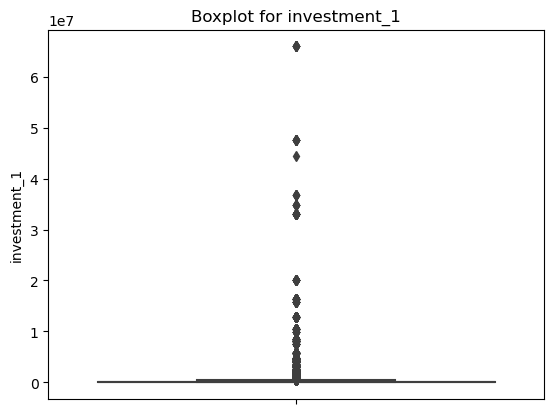

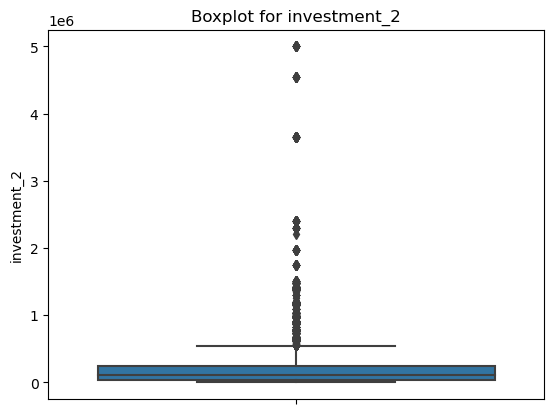

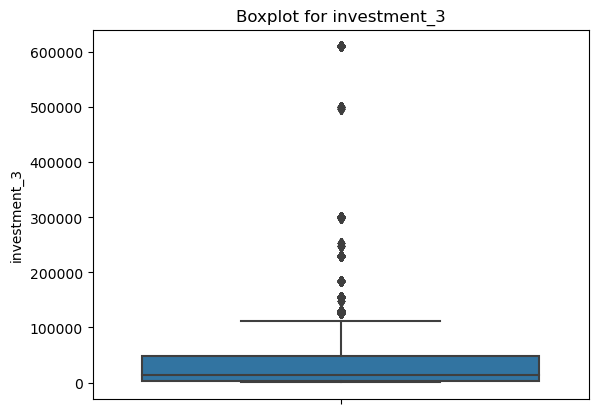

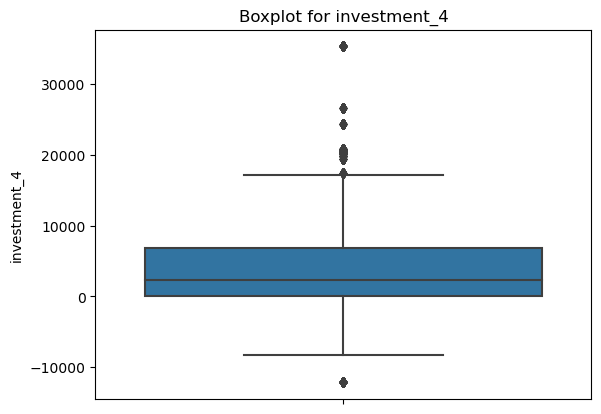

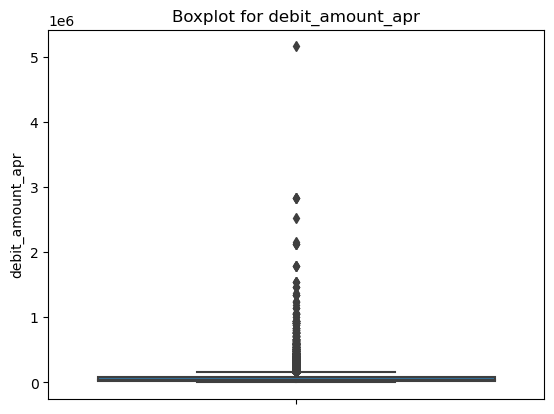

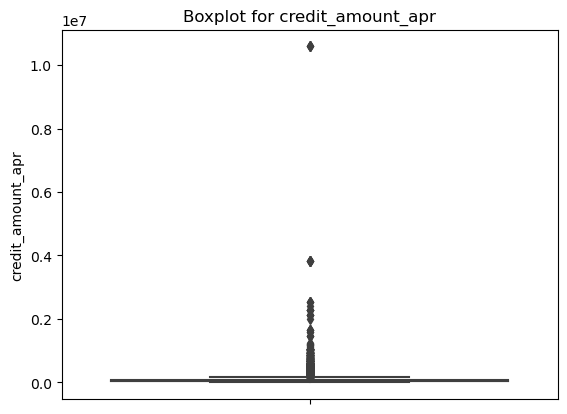

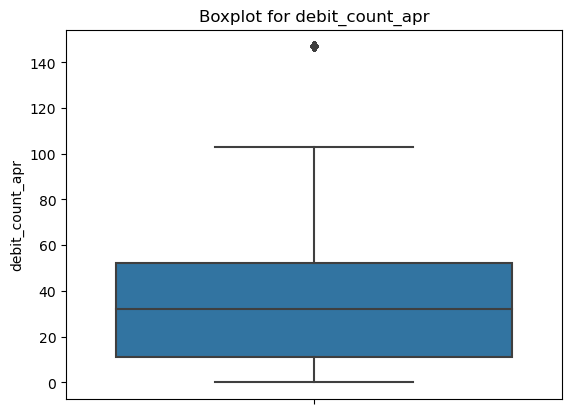

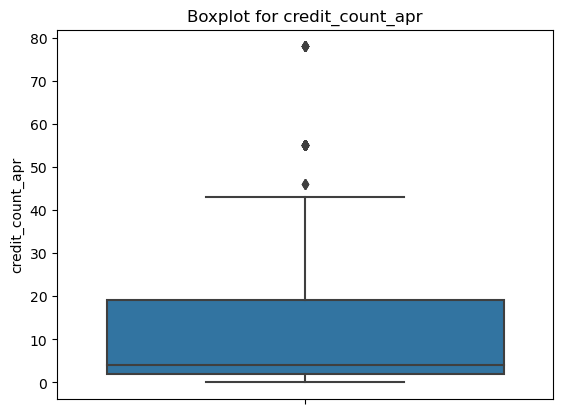

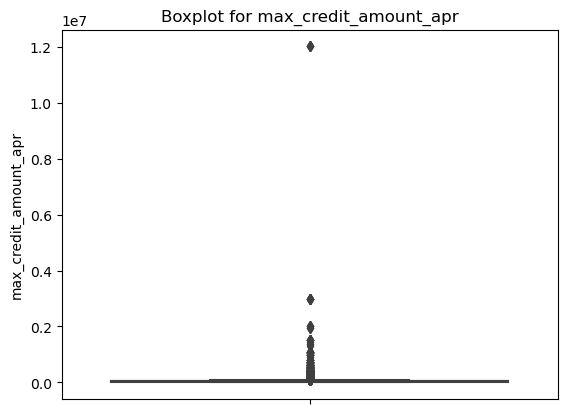

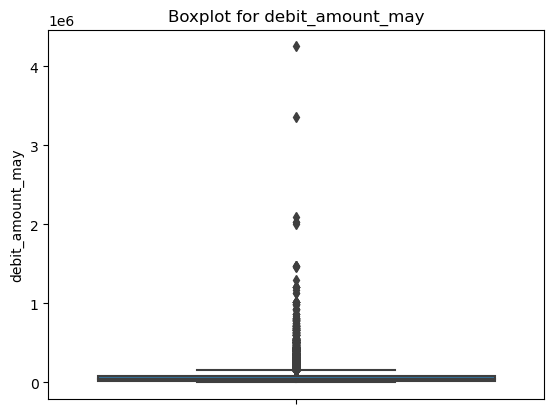

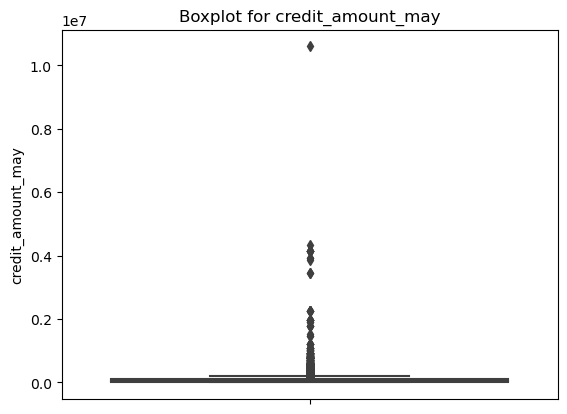

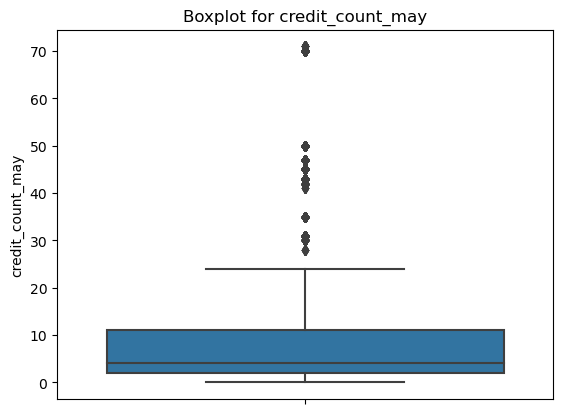

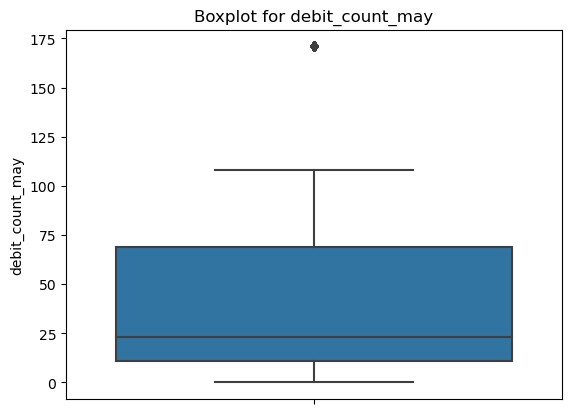

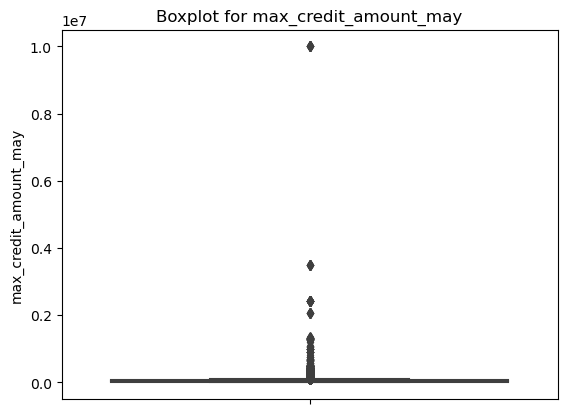

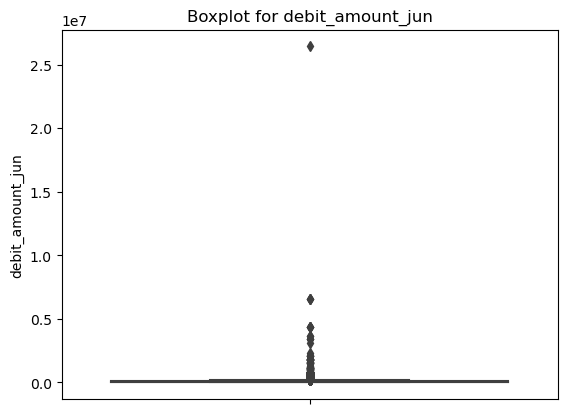

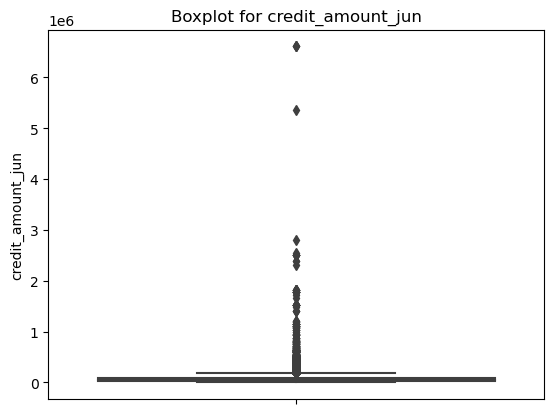

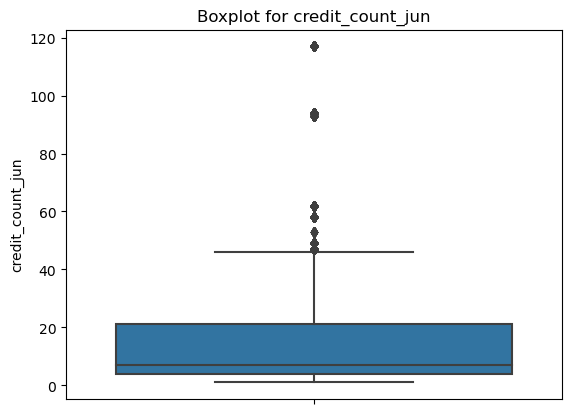

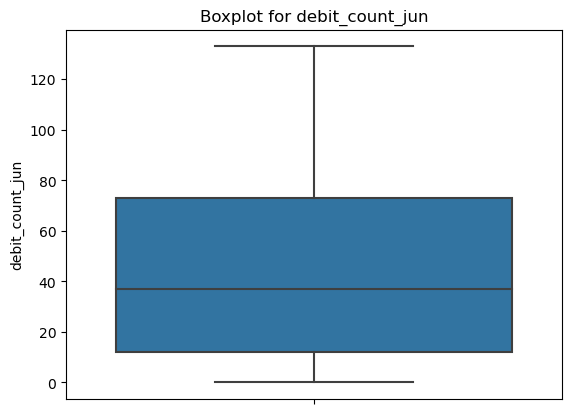

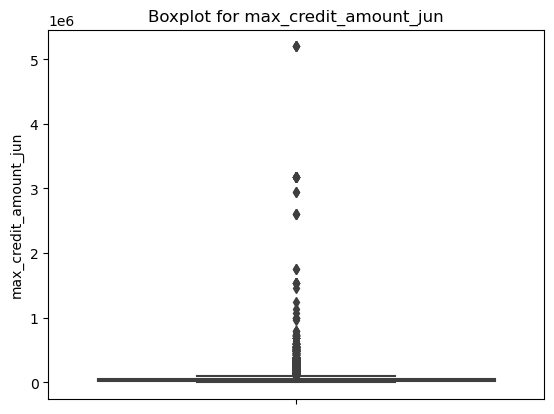

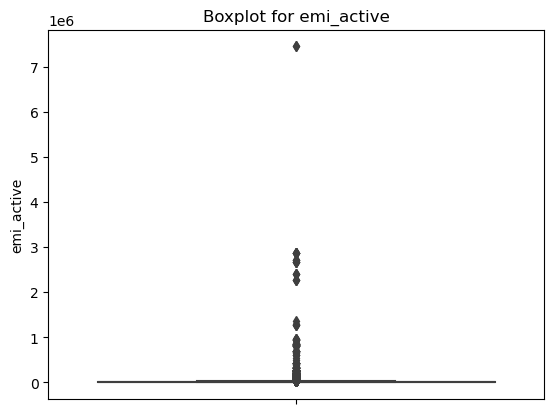

ID                              Axes(0.125,0.11;0.775x0.77)
age                             Axes(0.125,0.11;0.775x0.77)
Emp_Tenure_Years                Axes(0.125,0.11;0.775x0.77)
Tenure_with_Bank                Axes(0.125,0.11;0.775x0.77)
region_code                     Axes(0.125,0.11;0.775x0.77)
NetBanking_Flag                 Axes(0.125,0.11;0.775x0.77)
Avg_days_between_transaction    Axes(0.125,0.11;0.775x0.77)
cc_cons_apr                     Axes(0.125,0.11;0.775x0.77)
dc_cons_apr                     Axes(0.125,0.11;0.775x0.77)
cc_cons_may                     Axes(0.125,0.11;0.775x0.77)
dc_cons_may                     Axes(0.125,0.11;0.775x0.77)
cc_cons_jun                     Axes(0.125,0.11;0.775x0.77)
dc_cons_jun                     Axes(0.125,0.11;0.775x0.77)
cc_count_apr                    Axes(0.125,0.11;0.775x0.77)
cc_count_may                    Axes(0.125,0.11;0.775x0.77)
cc_count_jun                    Axes(0.125,0.11;0.775x0.77)
dc_count_apr                    Axes(0.1

In [21]:
num_demo_behv.apply(boxplot_creator)

#### As per the above boxplot viualization outlier treatment and missing value has done. 

In [22]:
# Mergning the credit consumption data with imputed data-

final = pd.merge(num_cat, cust_cons, how = 'left', on = 'ID')
final.head()

,account_type,gender,Income,loan_enq,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,current,M,MEDIUM,Y,19427,63,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,6881.81,3124.0,8.0,23,13,47,3,30,519000,1,1,1.0,1,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,2646.72,NaN
1,current,M,MEDIUM,Y,16150,36,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,12032.60,6738.0,19.0,32,7,1,37,16,402000,1,1,1.0,1,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,5469.79,NaN
2,current,F,MEDIUM,Y,11749,29,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,531.43,3778.0,12.0,30,44,22,15,37,114000,1,1,1.0,1,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,1035431.79,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,7207.85,NaN
3,current,M,MEDIUM,Y,11635,32,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,7996.00,293.0,24.0,85,47,4,1,1,298000,1,1,1.0,1,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,591.34,NaN
4,current,M,HIGH,Y,8908,32,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,5984.75,4933.0,100.0,9,14,62,55,81,381000,1,1,1.0,1,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,2621.39,NaN


In [23]:
# Droping below columns the reason, there is no varince in datapoint all are same value-
# personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq','ID'

final.drop(columns=['ID','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'], inplace= True)

In [24]:
#for i in final:
#    plt.figure(figsize=(6, 4))
#   plt.hist(final[i])
#   plt.title(f'Distribution of {i}')
#   plt.xlabel(i)
#    plt.ylabel('Frequency')
#    plt.show()
    

In [25]:
# Account Type(current is high) is having imbalance dataset.
# Gender (M is high).
# Income is having majority in medium > low > high.
# Mostly credit card users are age between(25-35).
# Netbanking flag (1 is high).
# Major transaction between (2-20).
# cc_cons_apr,may,june right skewed.
# dc_cons_apr right skewed

-1: Perfect negative correlation. The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
0: No correlation. The variables do not have a relationship with each other.
1: Perfect positive correlation. The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).

In [26]:
final

,account_type,gender,Income,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,current,M,MEDIUM,63,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,6881.81,3124.00,8.0,23,13,47,3,30,519000,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,2646.72,NaN
1,current,M,MEDIUM,36,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,12032.60,6738.00,19.0,32,7,1,37,16,402000,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,5469.79,NaN
2,current,F,MEDIUM,29,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,531.43,3778.00,12.0,30,44,22,15,37,114000,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,1035431.79,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,7207.85,NaN
3,current,M,MEDIUM,32,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,7996.00,293.00,24.0,85,47,4,1,1,298000,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,591.34,NaN
4,current,M,HIGH,32,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,5984.75,4933.00,100.0,9,14,62,55,81,381000,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,current,F,MEDIUM,64,31.5,6,354.0,1,7.0,4611.00,12015.50,69121.74,550.50,400.00,828.04,5.0,43,9,39,25,42,255000,199690.50,152664.00,51520.0,13135.0,39148.00,56225.00,29.0,35,29730.00,179983.00,61078.00,0,8,24438.0,153772.21,31284.00,3,38,42872.0,6334.20,NaN
19996,current,M,MEDIUM,53,19.8,5,809.0,0,14.0,9545.00,2061.00,4269.27,901.00,7977.50,5299.00,1.0,30,30,8,5,22,518000,3938.25,1752254.00,15477.0,4856.0,90755.10,26953.00,5.0,13,22103.00,17754.66,37545.00,47,11,213000.0,18098.47,93108.00,43,11,36747.0,102216.02,NaN
19997,current,F,MEDIUM,64,18.4,1,466.0,0,10.0,2028.93,9454.99,11019.00,4774.50,793.08,83247.00,6.0,6,1,2,4,13,359000,65640.00,64309.52,13873.0,2008.0,275542.16,26327.00,11.0,3,44500.00,22093.59,48230.00,2,171,34327.0,32198.63,46800.00,3,38,18810.0,1930.19,NaN
19998,current,M,LOW,32,6.0,8,619.0,0,17.0,11456.23,3999.00,2650.08,290.00,21111.50,11827.46,5.0,6,117,4,9,2,523000,47936.43,11982.00,3975.0,2351.0,60498.50,12276.00,5.0,26,52612.00,23546.48,112616.76,3,82,51929.0,27334.14,20201.00,47,80,11443.0,24499.91,NaN


### Here merging the columns as per card and use their similarity -

In [27]:
final['cc_cons_mean']= final[['cc_cons_apr','cc_cons_may','cc_cons_jun']].mean(axis=1).round(2)
final['dc_cons_mean']= final[['dc_cons_apr','dc_cons_may','dc_cons_jun']].mean(axis=1).round(2)
final['cc_count_mean']= final[['cc_count_apr','cc_count_may','cc_count_jun']].mean(axis=1).round(2)
final['dc_count_mean']= final[['dc_count_apr','dc_count_may','dc_count_jun']].mean(axis=1).round(2)
final['investment_mean']= final[['investment_1', 'investment_2', 'investment_3', 'investment_4']].mean(axis=1).round(2)
final['debit_amount_mean']= final[['debit_amount_apr','debit_amount_may','debit_amount_jun']].mean(axis=1).round(2).round(2)
final['credit_amount_mean']= final[['credit_amount_apr','credit_amount_may','credit_amount_jun']].mean(axis=1).round(2)
final['credit_count_mean']= final[['credit_count_apr','credit_count_may','credit_count_jun']].mean(axis=1).round(2)
final['max_credit_amount_mean']= final[['max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']].mean(axis=1).round(2)
final['debit_count_mean']= final[['debit_count_apr','debit_count_may','debit_count_jun']].mean(axis=1).round(2)

In [28]:
final.drop(columns=['cc_cons_apr','cc_cons_may','cc_cons_jun','dc_cons_apr','dc_cons_may','dc_cons_jun','cc_count_apr','cc_count_may','cc_count_jun',
'dc_count_apr','dc_count_may','dc_count_jun','investment_1', 'investment_2', 'investment_3', 'investment_4',
'debit_amount_apr','debit_amount_may','debit_amount_jun','credit_amount_apr','credit_amount_may','credit_amount_jun',
'credit_count_apr','credit_count_may','credit_count_jun','max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun',
'debit_count_apr','debit_count_may','debit_count_jun',],axis=1,inplace= True)

In [29]:
final['cc_cons_target']= final['cc_cons']
final.drop(columns=['cc_cons'], inplace= True)
final

,account_type,gender,Income,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,emi_active,cc_cons_mean,dc_cons_mean,cc_count_mean,dc_count_mean,investment_mean,debit_amount_mean,credit_amount_mean,credit_count_mean,max_credit_amount_mean,debit_count_mean,cc_cons_target
0,current,M,MEDIUM,63,30.1,10,628.0,1,5.0,519000,2646.72,8144.43,2764.19,14.67,26.67,28636.00,77210.64,158506.25,15.33,38330.67,57.67,NaN
1,current,M,MEDIUM,36,14.4,10,656.0,0,12.0,402000,5469.79,11966.24,4638.67,19.33,18.00,285980.92,70207.26,165532.51,4.00,42800.00,28.33,NaN
2,current,F,MEDIUM,29,4.8,10,314.0,1,13.0,114000,7207.85,11324.66,23829.77,28.67,24.67,70271.90,93883.76,36822.00,18.33,359270.93,59.67,NaN
3,current,M,MEDIUM,32,9.6,2,614.0,1,19.0,298000,591.34,7639.77,5844.73,52.00,2.00,51358.56,27502.78,112150.12,3.67,71727.33,40.00,NaN
4,current,M,HIGH,32,12.0,7,750.0,1,18.0,381000,2621.39,12805.91,11433.62,41.00,66.00,35150.29,96428.63,56274.67,8.33,36203.35,83.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,current,F,MEDIUM,64,31.5,6,354.0,1,7.0,255000,6334.20,24710.91,4464.68,19.00,35.33,104252.38,124301.07,49529.00,12.67,32346.67,25.00,NaN
19996,current,M,MEDIUM,53,19.8,5,809.0,0,14.0,518000,102216.02,7263.92,2753.67,20.33,11.67,444131.31,42202.74,52535.33,34.33,90616.67,9.00,NaN
19997,current,F,MEDIUM,64,18.4,1,466.0,0,10.0,359000,1930.19,4613.67,32492.16,4.33,6.33,36457.63,109944.79,40452.33,2.67,32545.67,73.33,NaN
19998,current,M,LOW,32,6.0,8,619.0,0,17.0,523000,24499.91,11739.27,5372.15,42.67,5.00,16561.11,37126.37,48364.59,25.33,38661.33,55.67,NaN


In [30]:
final['cc_cons_target'].count()

15000

In [31]:
final['gender'].value_counts()

M    17288
F     2712
Name: gender, dtype: int64

In [32]:
cat = final.select_dtypes(include= 'object')
num = final.select_dtypes(exclude='object')

In [33]:
#plt.figure(figsize=(18,12))
#cor= num.corr()
#sns.heatmap(cor, annot= True, cmap= plt.cm.afmhot_r)

In [34]:
# There is no correlation between these independent features

In [37]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.utils import resample

#### Encode Categorical data using Label Encode cause :-

In [38]:
label_encode= LabelEncoder()
cat['gender']= label_encode.fit_transform(cat['gender'])
cat['account_type']= label_encode.fit_transform(cat['account_type'])
cat['Income']= label_encode.fit_transform(cat['Income'])

In [39]:
# Idealy I have to change the Income column as ordinal category.
# Also Data is imbalanaced so through SMOTE method need to generate the balance data.

In [40]:
final_1= pd.concat([cat, num], axis=1)
final_1

,account_type,gender,Income,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,emi_active,cc_cons_mean,dc_cons_mean,cc_count_mean,dc_count_mean,investment_mean,debit_amount_mean,credit_amount_mean,credit_count_mean,max_credit_amount_mean,debit_count_mean,cc_cons_target
0,0,1,2,63,30.1,10,628.0,1,5.0,519000,2646.72,8144.43,2764.19,14.67,26.67,28636.00,77210.64,158506.25,15.33,38330.67,57.67,NaN
1,0,1,2,36,14.4,10,656.0,0,12.0,402000,5469.79,11966.24,4638.67,19.33,18.00,285980.92,70207.26,165532.51,4.00,42800.00,28.33,NaN
2,0,0,2,29,4.8,10,314.0,1,13.0,114000,7207.85,11324.66,23829.77,28.67,24.67,70271.90,93883.76,36822.00,18.33,359270.93,59.67,NaN
3,0,1,2,32,9.6,2,614.0,1,19.0,298000,591.34,7639.77,5844.73,52.00,2.00,51358.56,27502.78,112150.12,3.67,71727.33,40.00,NaN
4,0,1,0,32,12.0,7,750.0,1,18.0,381000,2621.39,12805.91,11433.62,41.00,66.00,35150.29,96428.63,56274.67,8.33,36203.35,83.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,2,64,31.5,6,354.0,1,7.0,255000,6334.20,24710.91,4464.68,19.00,35.33,104252.38,124301.07,49529.00,12.67,32346.67,25.00,NaN
19996,0,1,2,53,19.8,5,809.0,0,14.0,518000,102216.02,7263.92,2753.67,20.33,11.67,444131.31,42202.74,52535.33,34.33,90616.67,9.00,NaN
19997,0,0,2,64,18.4,1,466.0,0,10.0,359000,1930.19,4613.67,32492.16,4.33,6.33,36457.63,109944.79,40452.33,2.67,32545.67,73.33,NaN
19998,0,1,1,32,6.0,8,619.0,0,17.0,523000,24499.91,11739.27,5372.15,42.67,5.00,16561.11,37126.37,48364.59,25.33,38661.33,55.67,NaN


#### Separating the Null records with target value-

In [41]:
Null_df= final_1[final_1.isna().any(axis=1)]

final_2= final_1.dropna()

In [42]:
X = final_2.drop(columns= ['cc_cons_target'], axis=1) 
y= final_2['cc_cons_target']

### Spliting the Data into train and test- 

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
y_train.shape , y_test.shape

((10500,), (4500,))

In [45]:
X_train.shape, X_test.shape

((10500, 21), (4500, 21))

### Scaling the Data-

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error , r2_score

In [48]:
std_scale= StandardScaler()
X_train.scale= std_scale.fit_transform(X_train)
X_test.scale= std_scale.transform(X_test)

C:\Users\Avinash Dubey\AppData\Local\Temp\ipykernel_10072\3460423511.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.scale= std_scale.fit_transform(X_train)
C:\Users\Avinash Dubey\AppData\Local\Temp\ipykernel_10072\3460423511.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_test.scale= std_scale.transform(X_test)


### Training the Model-- KNN Regression

In [49]:
X_train

,account_type,gender,Income,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,emi_active,cc_cons_mean,dc_cons_mean,cc_count_mean,dc_count_mean,investment_mean,debit_amount_mean,credit_amount_mean,credit_count_mean,max_credit_amount_mean,debit_count_mean
11908,0,1,2,53,16.5,1,743.0,1,17.0,352000,13511.62,13216.19,3587.15,12.33,30.33,3379634.48,79744.63,65254.63,3.33,46966.42,55.33
6010,0,1,2,62,8.4,8,269.0,1,11.0,70000,2566.83,16070.65,8657.16,65.67,20.33,95082.73,42230.96,51766.00,3.33,29562.60,31.00
9624,1,1,1,29,5.6,7,394.0,1,6.0,402000,1086.13,17861.61,2046.00,30.33,42.33,75295.00,30404.23,113364.29,18.33,38866.00,22.33
1683,0,1,2,34,11.2,9,866.0,0,10.0,750000,262.93,11522.97,6738.67,14.33,19.33,299044.42,65559.58,88413.27,20.67,36112.65,36.67
13106,1,0,2,42,13.2,1,801.0,1,4.0,202500,34723.41,71656.39,7630.37,6.33,41.33,80083.52,143116.87,84118.59,35.00,39690.67,33.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,0,1,1,35,6.0,3,708.0,0,12.0,750000,3264.08,10666.40,5907.85,41.00,46.33,52097.81,38766.92,41910.00,7.00,82374.13,24.33
13529,0,1,1,63,12.9,8,639.0,1,11.0,17000,5529.91,11466.13,3888.33,31.67,30.00,75924.03,23338.80,110773.50,12.33,159245.08,22.00
5501,1,0,1,36,6.4,3,274.0,1,12.0,505000,1819.91,51645.15,5933.84,11.00,25.67,367664.66,54498.08,36129.72,22.00,39654.00,22.33
971,0,1,2,53,16.5,4,386.0,1,14.0,100000,518.29,23329.48,2305.40,47.00,32.33,87552.25,107371.42,47108.33,16.33,25479.33,15.67


In [50]:
knn_clf = KNeighborsRegressor(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [57]:
r2_score(y_test, test_preds)   # Error metrics

-0.3430470504250873

### Making Prediction

In [58]:
train_preds = knn_clf.predict(X_train)

test_preds = knn_clf.predict(X_test)

In [59]:
knn_clf.predict(X_train).shape

(10500,)

In [60]:
train_preds.shape

(10500,)

In [63]:
print(mean_absolute_error(y_train,train_preds), mean_absolute_error(y_test, test_preds))

50543.83549206349 75971.34451851853


In [62]:
print(np.sqrt(mean_squared_error(y_train,train_preds)), np.sqrt(mean_squared_error(y_test, test_preds)))

79604.41707682668 114288.07957635363


### Evaluation the Model- MAE, MSE

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error , r2_score

In [65]:
print(mean_absolute_error(y_train,train_preds), mean_absolute_error(y_test, test_preds))

50543.83549206349 75971.34451851853


In [66]:
print(np.sqrt(mean_squared_error(y_train,train_preds)), np.sqrt(mean_squared_error(y_test, test_preds)))

79604.41707682668 114288.07957635363


### Model Fitting by Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lnr = LinearRegression(n_jobs=200)
lnr.fit(X_train,y_train)

LinearRegression(n_jobs=200)

In [69]:
lnr_train_pred = lnr.predict(X_train)
lnr_test_pred = lnr.predict(X_test)

In [70]:
# Mean Square Error (RMSE)

mean_squared_error(y_test, lnr_test_pred)

9748526055.383654

In [71]:
# Mean Absolute Error

mean_absolute_error(y_test, lnr_test_pred)

70408.9433005195

### Train by Decision Tree-

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [74]:
# Predicting the model-

dtr_train_pred = dtr.predict(X_train)
dtr_test_pred  = dtr.predict(X_test)

In [75]:
# Evaluating the model-

mean_absolute_error(y_test, dtr_test_pred)

85866.358

In [76]:
mean_squared_error(y_test,dtr_test_pred)

21132362832.626446

In [77]:
pd.DataFrame(dtr_test_pred)

,0
0,319035.0
1,12622.0
2,11296.0
3,16245.0
4,5623.0
...,...
4495,14302.0
4496,5214.0
4497,207.0
4498,13551.0


In [80]:
pd.DataFrame(dtr_test_pred) # Predicted x test 
pd.DataFrame(y_test)   #---># actual y-test value

# Now check the x-test (actual) value and prected(x-test) value result difference.
# test< train (underfitting)
# test> train (overfitting)
null_X_value = Null_df.drop(columns='cc_cons_target', axis=1) #----> null values spliting in x variable and y target.

null_y = Null_df['cc_cons_target']  # 
pd.DataFrame(dtr.predict(null_X_value)) #---> # prediction of null value 

,0
0,175386.0
1,19731.0
2,84203.0
3,115.0
4,18029.0
...,...
4995,7677.0
4996,7272.0
4997,215762.0
4998,19499.0


In [131]:
#Null_df

### Random Forest-

In [81]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [82]:
rfm = RandomForestRegressor(n_estimators=100)
rfm.fit(X_train,y_train)

RandomForestRegressor()

In [83]:
rfm_train_pred = rfm.predict(X_train)
rfm_test_pred = rfm.predict(X_test)

In [84]:
mean_squared_error(y_test, rfm_test_pred)

10221878032.686232

In [85]:
mean_absolute_error(y_test, rfm_test_pred)

75365.46577555555

In [93]:
print(np.sqrt(mean_absolute_error(y_test, rfm_test_pred)), np.sqrt(mean_squared_error(y_test, rfm_test_pred)))

274.5277140391395 101103.3037674152


Skewness is a measure of the asymmetry or skew of a distribution. In the context of a histogram or a plot, skewness is visually represented by the tilt or elongation of the distribution.

Here's what different skewness values typically indicate in a distribution:

Negative Skewness (Left Skew):

In a negatively skewed distribution, the left tail is longer or fatter than the right tail.
The majority of the data points are concentrated on the right side of the distribution.
The mean is typically less than the median.
Positive Skewness (Right Skew):

In a positively skewed distribution, the right tail is longer or fatter than the left tail.
The majority of the data points are concentrated on the left side of the distribution.
The mean is typically greater than the median.
Zero Skewness:

A skewness of zero indicates a perfectly symmetrical distribution.
The left and right tails are of equal length.
The mean and median are equal.